In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_train.shape

(8693, 14)

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# let's check unique values
columns=df_train.columns
for col in columns:
    print(col,':\n',df_train[col].unique())
    print(df_train[col].value_counts())
    print('\n',20*'**','\n')

PassengerId :
 ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

 **************************************** 

HomePlanet :
 ['Europa' 'Earth' 'Mars' nan]
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

 **************************************** 

CryoSleep :
 [False True nan]
False    5439
True     3037
Name: CryoSleep, dtype: int64

 **************************************** 

Cabin :
 ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

 **************************************** 

Destination :
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
TRAPPIST-1e 

In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

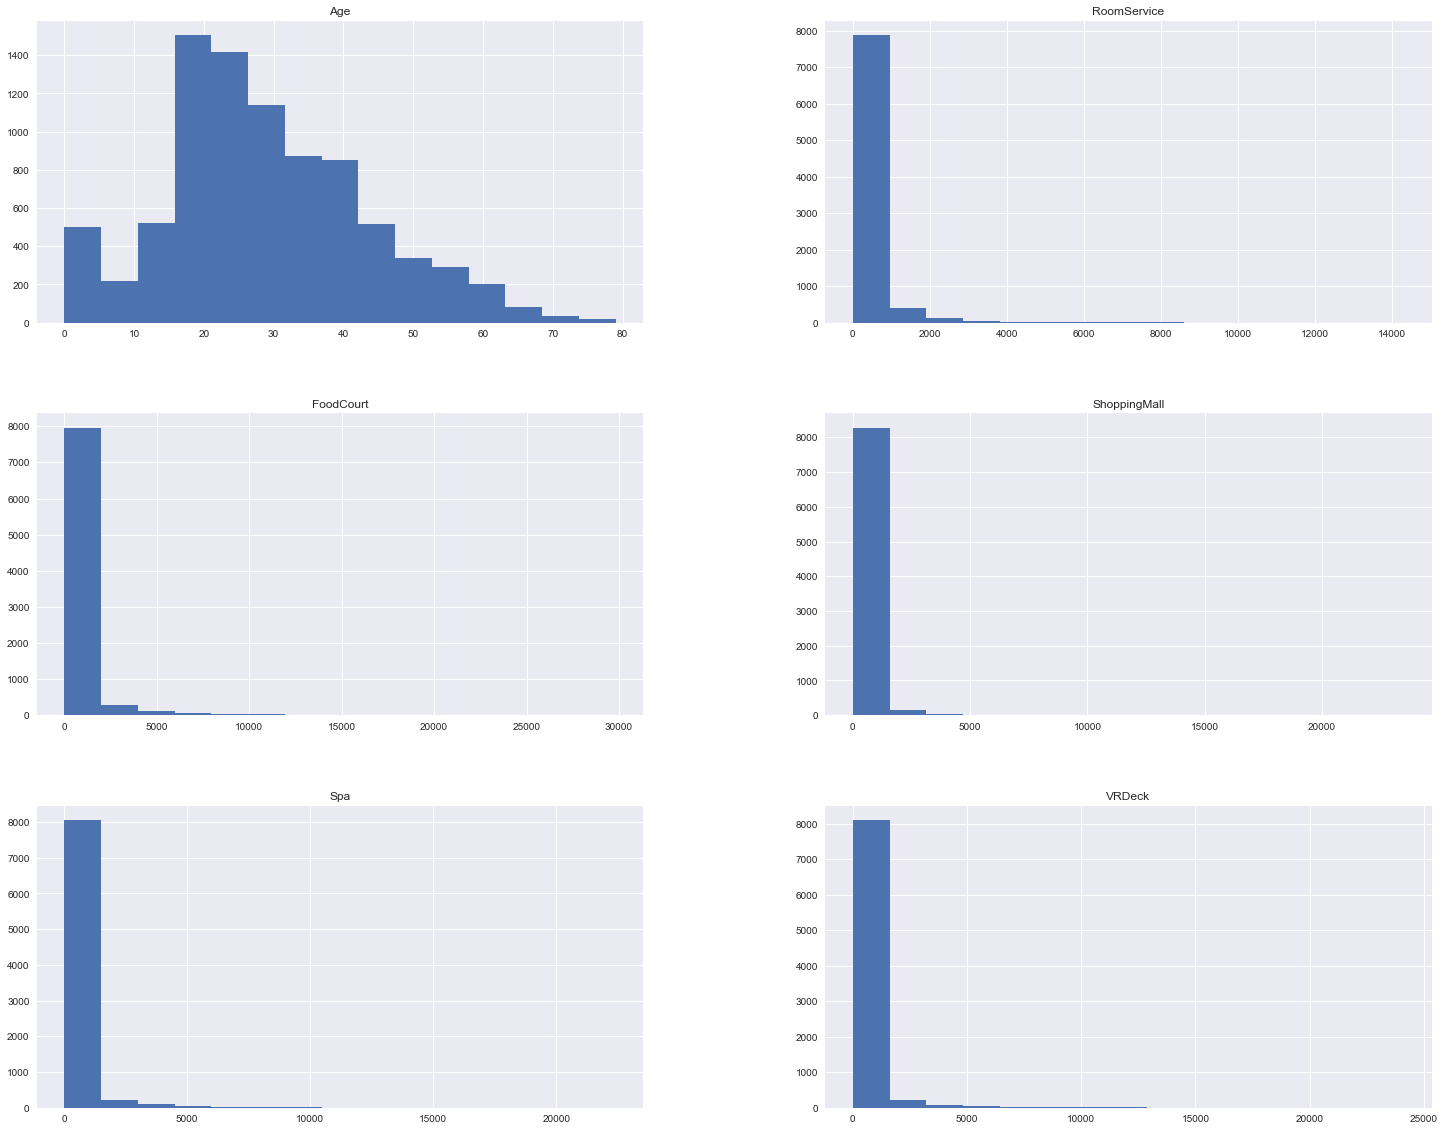

In [8]:
plt.style.use("seaborn")
df_train.hist(figsize=(25,20), bins=15)

In [9]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Exploratory Data Analysis

In [10]:
df_train['Transported'].unique()

array([False,  True])

In [15]:
df_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='count'>

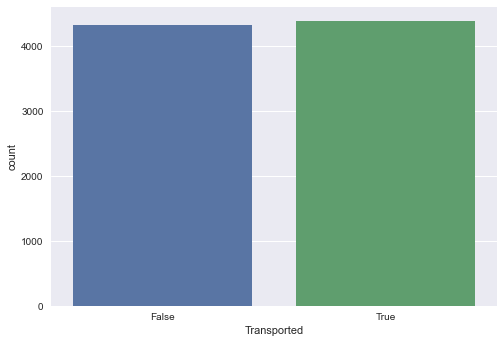

In [16]:
sns.countplot(x="Transported", data=df_train)

<AxesSubplot:ylabel='Transported'>

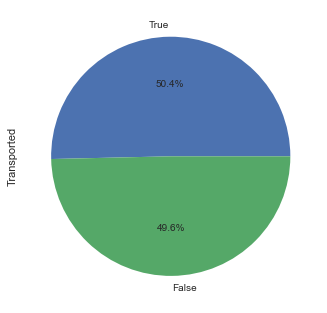

In [17]:
df_train['Transported'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [18]:
df_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [19]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

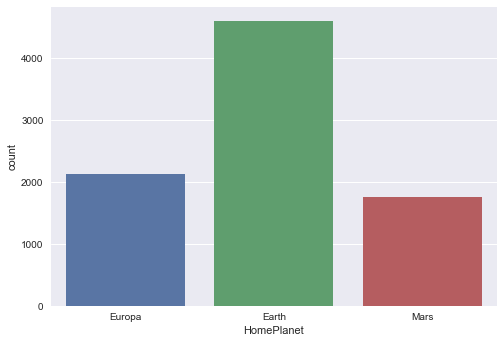

In [20]:
sns.countplot(x="HomePlanet", data=df_train)

<AxesSubplot:ylabel='HomePlanet'>

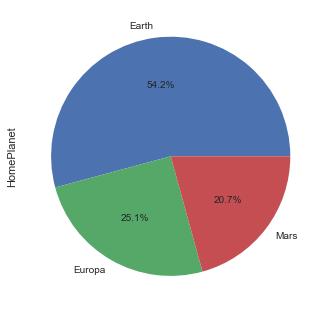

In [21]:
df_train['HomePlanet'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Transported Frequency according to Vip 

In [22]:
df_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [25]:
# Compare Transported column with VIP column
pd.crosstab(df_train.Transported, df_train.VIP)

VIP,False,True
Transported,,
False,4093,123
True,4198,76


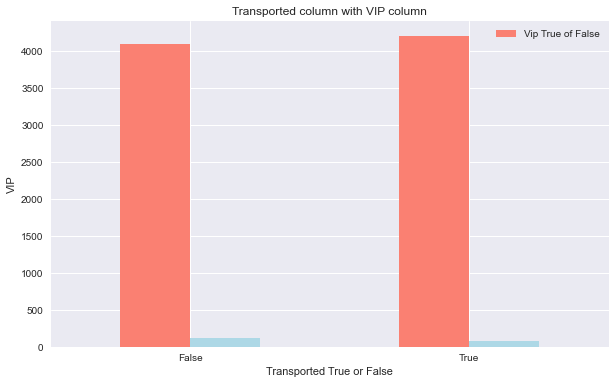

In [27]:
# Create a plot of crosstab
pd.crosstab(df_train.Transported, df_train.VIP).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Transported column with VIP column")
plt.xlabel("Transported True or False")
plt.ylabel("VIP")
plt.legend(["Vip True or False"]);
plt.xticks(rotation=0);

### Transported Frequency according to Cryosleep

In [30]:
df_train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [31]:
# Compare Transported column with VIP CryoSleep
pd.crosstab(df_train.Transported, df_train.CryoSleep)

CryoSleep,False,True
Transported,,
False,3650,554
True,1789,2483


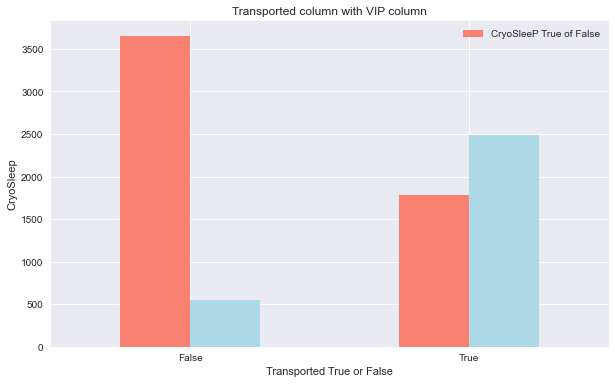

In [32]:
# Create a plot of crosstab
pd.crosstab(df_train.Transported, df_train.CryoSleep).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Transported column with VIP column")
plt.xlabel("Transported True or False")
plt.ylabel("CryoSleep")
plt.legend(["CryoSleeP True or False"]);
plt.xticks(rotation=0);

### Transported Frequency according to Destination

In [35]:
df_train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [36]:
# Compare Transported column with Destination column
pd.crosstab(df_train.Transported, df_train.Destination)

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3128
True,1098,401,2787


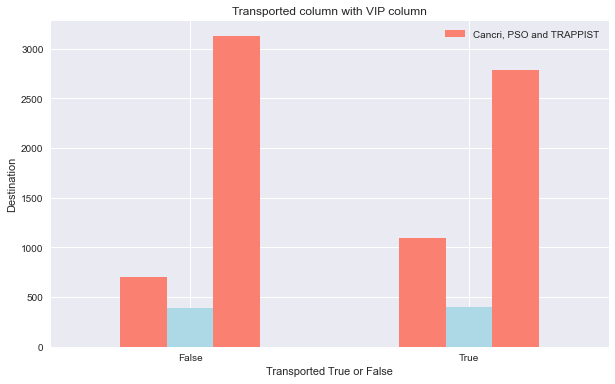

In [37]:
# Create a plot of crosstab
pd.crosstab(df_train.Transported, df_train.Destination).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Transported column with VIP column")
plt.xlabel("Transported True or False")
plt.ylabel("Destination")
plt.legend(["Cancri, PSO and TRAPPIST"]);
plt.xticks(rotation=0);

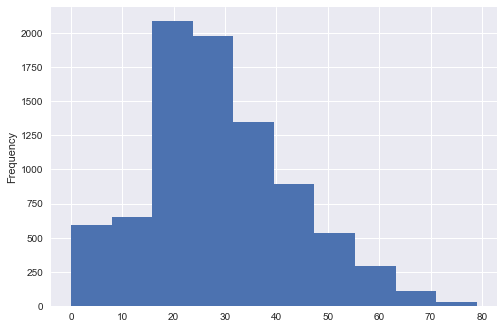

In [43]:
# Check the distribution of the age column with a histogram
df_train.Age.plot.hist();

In [39]:
df_train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


(7.5, -0.5)

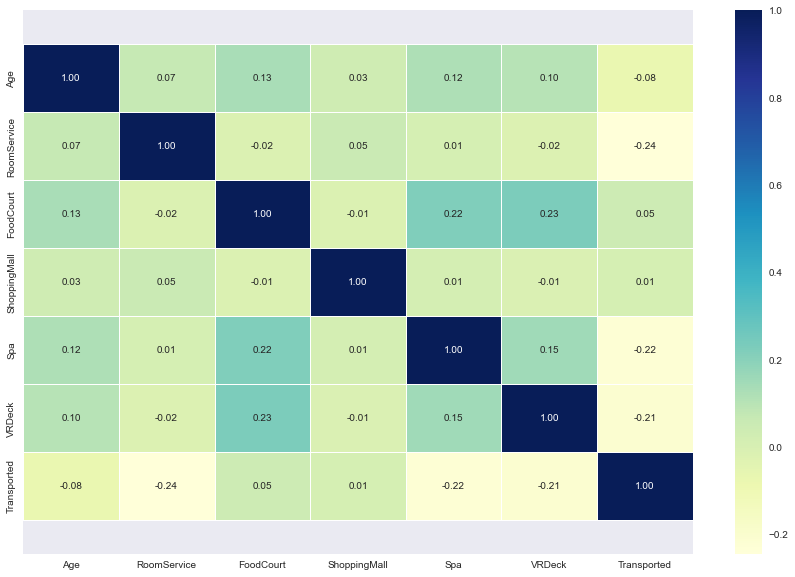

In [11]:
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [16]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [23]:
# Fill missing values with the mean
df_train = df_train.fillna(df_train.mean())

In [26]:
# Fill missing values with the mean
df_train = df_train.fillna(df_train['HomePlanet'].mode().iloc[0])
df_train = df_train.fillna(df_train['Cabin'].mode().iloc[0])
df_train = df_train.fillna(df_train['Destination'].mode().iloc[0])
df_train = df_train.fillna(df_train['Name'].mode().iloc[0])

In [27]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [35]:
# df_train = df_train.drop("PassengerId", axis=1)
df_train = df_train.drop("Name", axis=1)

In [37]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df_train['HomePlanet']  = Lb.fit_transform(df_train['HomePlanet'])
df_train['CryoSleep']  = Lb.fit_transform(df_train['CryoSleep'])
df_train['Cabin']  = Lb.fit_transform(df_train['Cabin'])
df_train['Destination']  = Lb.fit_transform(df_train['Destination'])
df_train['VIP']  = Lb.fit_transform(df_train['VIP'])
df_train['Transported']  = Lb.fit_transform(df_train['Transported'])

### Modeling

In [40]:
# Split data into X and y
X = df_train.drop("Transported", axis=1)

y = df_train["Transported"]

In [41]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,149,3,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2185,3,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0
3,1,0,1,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2187,3,16.0,0,303.0,70.0,151.0,565.0,2.0


In [42]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [45]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [46]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2333,0,0,2183,3,28.0,0,0.000000,55.0,0.0,656.0,0.0
2589,0,0,3953,3,17.0,0,0.000000,1195.0,31.0,0.0,0.0
8302,1,2,932,0,28.0,0,0.000000,0.0,0.0,0.0,0.0
8177,2,0,3334,3,20.0,0,224.687617,2.0,289.0,976.0,0.0
500,1,2,719,0,36.0,0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5734,0,1,6540,3,18.0,0,14.000000,2.0,144.0,610.0,0.0
5191,2,0,2280,3,50.0,1,690.000000,0.0,30.0,762.0,428.0
5390,0,0,2473,2,22.0,0,158.000000,0.0,476.0,0.0,26.0
860,2,0,3411,3,34.0,0,379.000000,0.0,1626.0,0.0,0.0


In [47]:
y_val

304     1
2697    0
8424    0
1672    1
8458    1
       ..
7175    0
3187    1
1302    0
5934    1
6093    0
Name: Transported, Length: 1739, dtype: int64

In [50]:
models = {"XGBoost": XGBClassifier(),
          "CatBoost": CatBoostClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [51]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

Learning rate set to 0.023581
0:	learn: 0.6821592	total: 6.6ms	remaining: 6.59s
1:	learn: 0.6714835	total: 13ms	remaining: 6.47s
2:	learn: 0.6605167	total: 19.3ms	remaining: 6.42s
3:	learn: 0.6506448	total: 25.6ms	remaining: 6.38s
4:	learn: 0.6402400	total: 32.1ms	remaining: 6.38s
5:	learn: 0.6303243	total: 38.4ms	remaining: 6.36s
6:	learn: 0.6227780	total: 44.9ms	remaining: 6.37s
7:	learn: 0.6140738	total: 51.1ms	remaining: 6.33s
8:	learn: 0.6063731	total: 57.4ms	remaining: 6.32s
9:	learn: 0.5987365	total: 65ms	remaining: 6.43s
10:	learn: 0.5924801	total: 73ms	remaining: 6.56s
11:	learn: 0.5859929	total: 79.6ms	remaining: 6.55s
12:	learn: 0.5807140	total: 86ms	remaining: 6.53s
13:	learn: 0.5753108	total: 92.4ms	remaining: 6.51s
14:	learn: 0.5698712	total: 98.8ms	remaining: 6.48s
15:	learn: 0.5643217	total: 105ms	remaining: 6.47s
16:	learn: 0.5587761	total: 112ms	remaining: 6.47s
17:	learn: 0.5543122	total: 119ms	remaining: 6.47s
18:	learn: 0.5499953	total: 125ms	remaining: 6.47s
19:	l

177:	learn: 0.4049377	total: 1.3s	remaining: 5.99s
178:	learn: 0.4047400	total: 1.3s	remaining: 5.99s
179:	learn: 0.4044751	total: 1.31s	remaining: 5.99s
180:	learn: 0.4042698	total: 1.32s	remaining: 5.99s
181:	learn: 0.4040331	total: 1.33s	remaining: 5.99s
182:	learn: 0.4038081	total: 1.34s	remaining: 5.98s
183:	learn: 0.4035865	total: 1.35s	remaining: 5.97s
184:	learn: 0.4034614	total: 1.36s	remaining: 5.99s
185:	learn: 0.4032610	total: 1.37s	remaining: 5.99s
186:	learn: 0.4030089	total: 1.37s	remaining: 5.97s
187:	learn: 0.4025982	total: 1.38s	remaining: 5.97s
188:	learn: 0.4024148	total: 1.39s	remaining: 5.96s
189:	learn: 0.4022332	total: 1.4s	remaining: 5.95s
190:	learn: 0.4020187	total: 1.4s	remaining: 5.94s
191:	learn: 0.4017717	total: 1.41s	remaining: 5.93s
192:	learn: 0.4016426	total: 1.42s	remaining: 5.92s
193:	learn: 0.4012767	total: 1.42s	remaining: 5.91s
194:	learn: 0.4011392	total: 1.43s	remaining: 5.9s
195:	learn: 0.4009687	total: 1.44s	remaining: 5.89s
196:	learn: 0.400

347:	learn: 0.3772824	total: 2.78s	remaining: 5.21s
348:	learn: 0.3771969	total: 2.79s	remaining: 5.21s
349:	learn: 0.3770722	total: 2.81s	remaining: 5.21s
350:	learn: 0.3769926	total: 2.81s	remaining: 5.2s
351:	learn: 0.3768672	total: 2.82s	remaining: 5.2s
352:	learn: 0.3767838	total: 2.83s	remaining: 5.19s
353:	learn: 0.3766776	total: 2.84s	remaining: 5.19s
354:	learn: 0.3765661	total: 2.85s	remaining: 5.18s
355:	learn: 0.3764522	total: 2.86s	remaining: 5.18s
356:	learn: 0.3763422	total: 2.87s	remaining: 5.17s
357:	learn: 0.3762302	total: 2.88s	remaining: 5.17s
358:	learn: 0.3761161	total: 2.89s	remaining: 5.16s
359:	learn: 0.3758528	total: 2.9s	remaining: 5.15s
360:	learn: 0.3757117	total: 2.91s	remaining: 5.15s
361:	learn: 0.3756161	total: 2.92s	remaining: 5.14s
362:	learn: 0.3754501	total: 2.93s	remaining: 5.14s
363:	learn: 0.3752588	total: 2.94s	remaining: 5.13s
364:	learn: 0.3751775	total: 2.95s	remaining: 5.13s
365:	learn: 0.3750433	total: 2.96s	remaining: 5.13s
366:	learn: 0.3

521:	learn: 0.3559277	total: 4.49s	remaining: 4.11s
522:	learn: 0.3558536	total: 4.5s	remaining: 4.1s
523:	learn: 0.3555607	total: 4.54s	remaining: 4.12s
524:	learn: 0.3554815	total: 4.54s	remaining: 4.11s
525:	learn: 0.3553860	total: 4.55s	remaining: 4.1s
526:	learn: 0.3552451	total: 4.56s	remaining: 4.09s
527:	learn: 0.3551341	total: 4.57s	remaining: 4.08s
528:	learn: 0.3549762	total: 4.57s	remaining: 4.07s
529:	learn: 0.3548895	total: 4.58s	remaining: 4.06s
530:	learn: 0.3548135	total: 4.59s	remaining: 4.05s
531:	learn: 0.3546890	total: 4.6s	remaining: 4.04s
532:	learn: 0.3545775	total: 4.61s	remaining: 4.04s
533:	learn: 0.3544284	total: 4.61s	remaining: 4.03s
534:	learn: 0.3543586	total: 4.62s	remaining: 4.02s
535:	learn: 0.3542529	total: 4.63s	remaining: 4.01s
536:	learn: 0.3540994	total: 4.64s	remaining: 4s
537:	learn: 0.3540380	total: 4.64s	remaining: 3.99s
538:	learn: 0.3539592	total: 4.65s	remaining: 3.98s
539:	learn: 0.3538766	total: 4.66s	remaining: 3.97s
540:	learn: 0.35377

696:	learn: 0.3361890	total: 5.79s	remaining: 2.52s
697:	learn: 0.3360634	total: 5.8s	remaining: 2.51s
698:	learn: 0.3359876	total: 5.81s	remaining: 2.5s
699:	learn: 0.3359205	total: 5.82s	remaining: 2.49s
700:	learn: 0.3358040	total: 5.83s	remaining: 2.48s
701:	learn: 0.3357006	total: 5.83s	remaining: 2.48s
702:	learn: 0.3355869	total: 5.84s	remaining: 2.47s
703:	learn: 0.3355343	total: 5.85s	remaining: 2.46s
704:	learn: 0.3354331	total: 5.86s	remaining: 2.45s
705:	learn: 0.3353065	total: 5.86s	remaining: 2.44s
706:	learn: 0.3351581	total: 5.87s	remaining: 2.43s
707:	learn: 0.3350262	total: 5.88s	remaining: 2.42s
708:	learn: 0.3349660	total: 5.88s	remaining: 2.42s
709:	learn: 0.3348301	total: 5.89s	remaining: 2.41s
710:	learn: 0.3347582	total: 5.9s	remaining: 2.4s
711:	learn: 0.3346827	total: 5.91s	remaining: 2.39s
712:	learn: 0.3346129	total: 5.92s	remaining: 2.38s
713:	learn: 0.3345354	total: 5.92s	remaining: 2.37s
714:	learn: 0.3344544	total: 5.93s	remaining: 2.36s
715:	learn: 0.33

869:	learn: 0.3200945	total: 7.05s	remaining: 1.05s
870:	learn: 0.3200063	total: 7.05s	remaining: 1.04s
871:	learn: 0.3199145	total: 7.06s	remaining: 1.04s
872:	learn: 0.3198565	total: 7.07s	remaining: 1.03s
873:	learn: 0.3197887	total: 7.08s	remaining: 1.02s
874:	learn: 0.3196717	total: 7.09s	remaining: 1.01s
875:	learn: 0.3195539	total: 7.09s	remaining: 1s
876:	learn: 0.3194902	total: 7.1s	remaining: 996ms
877:	learn: 0.3193785	total: 7.11s	remaining: 988ms
878:	learn: 0.3193052	total: 7.11s	remaining: 979ms
879:	learn: 0.3191999	total: 7.12s	remaining: 971ms
880:	learn: 0.3191363	total: 7.13s	remaining: 963ms
881:	learn: 0.3190640	total: 7.13s	remaining: 954ms
882:	learn: 0.3189897	total: 7.14s	remaining: 946ms
883:	learn: 0.3189453	total: 7.15s	remaining: 938ms
884:	learn: 0.3188502	total: 7.15s	remaining: 930ms
885:	learn: 0.3187629	total: 7.16s	remaining: 922ms
886:	learn: 0.3186278	total: 7.17s	remaining: 913ms
887:	learn: 0.3185282	total: 7.18s	remaining: 905ms
888:	learn: 0.31

{'XGBoost': 0.780333525014376, 'CatBoost': 0.8010350776308223}

### Model Comparison

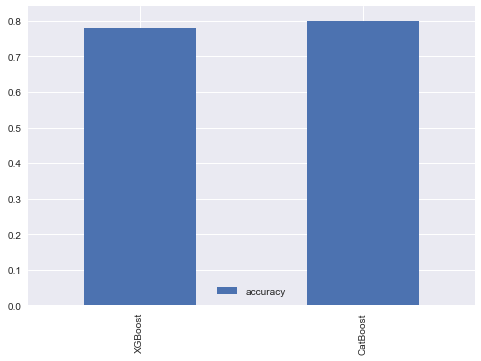

In [52]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        xgb_base,
        X_valid,
        y_valid,
        display_labels=["Transported", "Not Transported"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()